In [393]:
# Import the required modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, balanced_accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

##### Data Manipulation 

In [394]:
# Read the train.csv file from the Resources folder into a Pandas DataFrame
GeneticDisorder_df = pd.read_csv(
    Path(r"Resources\train.csv")
)

# Review the DataFrame
display(GeneticDisorder_df.head())
display(GeneticDisorder_df.tail())

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [395]:
# Get column names and data
GeneticDisorder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [396]:
# Drop unnecessary columns from the training dataset
columns_to_remove = ['Patient Id', 'Patient First Name', 'Family Name', 'Father\'s name', 'Mother\'s age', 'Father\'s age', 'Institute Name', 'Location of Institute','Test 1','Test 2','Test 3','Test 4','Test 5','Symptom 1','Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5','Parental consent', 'Autopsy shows birth defect (if applicable)', 'Disorder Subclass']
columns_to_remove_train = [col for col in columns_to_remove if col in GeneticDisorder_df.columns]
GeneticDisorder_cleaned_df = GeneticDisorder_df.drop(columns=columns_to_remove_train)

In [397]:
# Count the number of NaN values in each column
nan_counts = GeneticDisorder_cleaned_df.isna().sum()

# Display the results
print("Number of NaN values in each column:")
print(nan_counts)

Number of NaN values in each column:
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Follow-up                                           2166
Gender                                              2173
Birth asphyxia                                      2139
Place of birth                                      2124
Folic acid details (peri-conceptional)              2117
H/O serious maternal illness                        2152
H/O radiation exposure (x-ray)                      2153
H/O substance abuse                                

In [398]:
# Drop rows with missing values
GeneticDisorder_dropped_df = GeneticDisorder_cleaned_df.dropna()

In [399]:
# Confirm no NaN values are reflected
nan_counts_after_drop = GeneticDisorder_dropped_df.isna().sum()
print("\nNumber of NaN values in each column after dropping rows:")
print(nan_counts_after_drop)


Number of NaN values in each column after dropping rows:
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Place of birth                                      0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ray)                      0
H/O substance abuse                                 0
Assisted conception IVF/

In [400]:
# Confirm that are no duplicate rows
duplicate_count = GeneticDisorder_dropped_df.duplicated().sum()

print("Count of duplicate rows:", duplicate_count)

# X_train_no_duplicates = GeneticDisorder_dropped_df.drop_duplicates()

Count of duplicate rows: 0


In [401]:
# Replace '-' with 'Not applicable' in the entire DataFrame
GeneticDisorder_dropped_df = GeneticDisorder_dropped_df.copy()
GeneticDisorder_dropped_df.replace('-', 'Not applicable', inplace=True)


In [402]:
# Replace 'Not applicable' with 'No' in the entire DataFrame
# GeneticDisorder_dropped_df = GeneticDisorder_dropped_df.copy()
# GeneticDisorder_dropped_df.replace('Not applicable', 'No', inplace=True)

In [403]:
display(GeneticDisorder_dropped_df.head())
display(GeneticDisorder_dropped_df.tail())

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder
8,11.0,No,No,Yes,No,5.209058,Alive,Tachypnea,Tachycardia,Low,...,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,Mitochondrial genetic inheritance disorders
9,4.0,No,Yes,Yes,Yes,4.752272,Alive,Tachypnea,Tachycardia,Low,...,No,No,No,Yes,Yes,1.0,Multiple,6.397702,abnormal,Multifactorial genetic inheritance disorders
12,1.0,Yes,Yes,No,No,4.612265,Deceased,Normal (30-60),Tachycardia,High,...,No,Yes,Not applicable,Yes,Yes,0.0,Singular,7.995115,slightly abnormal,Mitochondrial genetic inheritance disorders
14,6.0,Yes,No,Yes,No,4.620420,Alive,Tachypnea,Tachycardia,High,...,Yes,Yes,Not applicable,No,No,3.0,Multiple,3.000000,slightly abnormal,Mitochondrial genetic inheritance disorders
18,10.0,Yes,Yes,Yes,No,4.751452,Deceased,Normal (30-60),Tachycardia,Low,...,No,Yes,No,Yes,Yes,3.0,Singular,9.382407,abnormal,Mitochondrial genetic inheritance disorders


,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,...,H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Genetic Disorder
22066,13.0,No,Yes,No,Yes,4.777036,Alive,Normal (30-60),Normal,High,...,Yes,No,Not applicable,No,Yes,1.0,Singular,3.000736,normal,Mitochondrial genetic inheritance disorders
22068,4.0,Yes,No,No,No,5.077554,Deceased,Normal (30-60),Normal,Low,...,Yes,No,Not applicable,No,No,1.0,Singular,9.566549,inconclusive,Multifactorial genetic inheritance disorders
22076,0.0,Yes,No,Yes,No,4.931758,Alive,Normal (30-60),Tachycardia,Low,...,No,Not applicable,No,Yes,Yes,1.0,Singular,11.649052,abnormal,Mitochondrial genetic inheritance disorders
22079,8.0,No,Yes,No,Yes,4.974220,Alive,Normal (30-60),Normal,High,...,Yes,No,Not applicable,Yes,No,2.0,Multiple,7.041556,inconclusive,Multifactorial genetic inheritance disorders
22082,11.0,Yes,No,No,No,4.738067,Deceased,Normal (30-60),Normal,High,...,Yes,Not applicable,No,Yes,Yes,4.0,Singular,11.188371,normal,Multifactorial genetic inheritance disorders


In [404]:
# Export cleaned CSV data
GeneticDisorder_dropped_df.to_csv('Resources/genetic_disorder.csv', index=False)

###### Create the labels

In [405]:
# Identify categorical columns
categorical_columns = GeneticDisorder_dropped_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
GeneticDisorder_encoded_df = pd.get_dummies(GeneticDisorder_dropped_df, columns=categorical_columns, drop_first=True)
GeneticDisorder_encoded_df


,Patient Age,Blood cell count (mcL),No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,Respiratory Rate (breaths/min)_Tachypnea,...,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Genetic Disorder_Multifactorial genetic inheritance disorders,Genetic Disorder_Single-gene inheritance diseases
8,11.0,5.209058,0.0,6.669552,False,False,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9,4.0,4.752272,1.0,6.397702,False,True,True,True,False,True,...,False,False,True,True,False,False,False,False,True,False
12,1.0,4.612265,0.0,7.995115,True,True,False,False,True,False,...,True,False,True,True,True,False,False,True,False,False
14,6.0,4.620420,3.0,3.000000,True,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False
18,10.0,4.751452,3.0,9.382407,True,True,True,False,True,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,13.0,4.777036,1.0,3.000736,False,True,False,True,False,False,...,True,False,False,True,True,False,True,False,False,False
22068,4.0,5.077554,1.0,9.566549,True,False,False,False,True,False,...,True,False,False,False,True,True,False,False,True,False
22076,0.0,4.931758,1.0,11.649052,True,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
22079,8.0,4.974220,2.0,7.041556,False,True,False,True,False,False,...,True,False,True,False,False,True,False,False,True,False


In [406]:
# Obtain the 'Genetic Disorder' names in the columns
print(GeneticDisorder_encoded_df.columns)

Index(['Patient Age', 'Blood cell count (mcL)', 'No. of previous abortion',
       'White Blood cell count (thousand per microliter)',
       'Genes in mother's side_Yes', 'Inherited from father_Yes',
       'Maternal gene_Yes', 'Paternal gene_Yes', 'Status_Deceased',
       'Respiratory Rate (breaths/min)_Tachypnea',
       'Heart Rate (rates/min_Tachycardia', 'Follow-up_Low', 'Gender_Female',
       'Gender_Male', 'Birth asphyxia_No record',
       'Birth asphyxia_Not available', 'Birth asphyxia_Yes',
       'Place of birth_Institute',
       'Folic acid details (peri-conceptional)_Yes',
       'H/O serious maternal illness_Yes',
       'H/O radiation exposure (x-ray)_Not applicable',
       'H/O radiation exposure (x-ray)_Yes',
       'H/O substance abuse_Not applicable', 'H/O substance abuse_Yes',
       'Assisted conception IVF/ART_Yes',
       'History of anomalies in previous pregnancies_Yes',
       'Birth defects_Singular', 'Blood test result_inconclusive',
       'Blood test 

In [407]:
# Create a binary target column indicating the presence (1) or absence (0) of a genetic disorder
GeneticDisorder_encoded_df['GeneticDisorder_Present'] = (
    GeneticDisorder_encoded_df['Genetic Disorder_Multifactorial genetic inheritance disorders'] |
    GeneticDisorder_encoded_df['Genetic Disorder_Single-gene inheritance diseases']
).astype(int)

# Drop the original columns used for creating the binary target column
GeneticDisorder_encoded_df.drop(['Genetic Disorder_Multifactorial genetic inheritance disorders', 'Genetic Disorder_Single-gene inheritance diseases'], axis=1, inplace=True)

# 'GeneticDisorder_Present' is now the binary target column


In [408]:
# Using all columns as features for training
X = GeneticDisorder_encoded_df.drop(['GeneticDisorder_Present'], axis=1)  # Exclude the target column
y = GeneticDisorder_encoded_df['GeneticDisorder_Present']


In [409]:
GeneticDisorder_encoded_df

,Patient Age,Blood cell count (mcL),No. of previous abortion,White Blood cell count (thousand per microliter),Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,Respiratory Rate (breaths/min)_Tachypnea,...,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,GeneticDisorder_Present
8,11.0,5.209058,0.0,6.669552,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,True,0
9,4.0,4.752272,1.0,6.397702,False,True,True,True,False,True,...,False,False,False,True,True,False,False,False,False,1
12,1.0,4.612265,0.0,7.995115,True,True,False,False,True,False,...,True,True,False,True,True,True,False,False,True,0
14,6.0,4.620420,3.0,3.000000,True,False,True,False,False,True,...,True,True,False,False,False,False,False,False,True,0
18,10.0,4.751452,3.0,9.382407,True,True,True,False,True,False,...,True,False,False,True,True,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22066,13.0,4.777036,1.0,3.000736,False,True,False,True,False,False,...,False,True,False,False,True,True,False,True,False,0
22068,4.0,5.077554,1.0,9.566549,True,False,False,False,True,False,...,False,True,False,False,False,True,True,False,False,1
22076,0.0,4.931758,1.0,11.649052,True,False,True,False,False,False,...,False,False,False,True,True,True,False,False,False,0
22079,8.0,4.974220,2.0,7.041556,False,True,False,True,False,False,...,False,True,False,True,False,False,True,False,False,1


In [410]:
#Scale the data
# Data focuses on "Patient Age" and "Blood cell count (mcL)" columns only 
#X, y = make_blobs(centers=2, random_state=1, cluster_std=2)

#X_train, X_test, y_train, y_test = train_test_split(X, 
 #                                                   y, 
  #                                                  random_state=1, 
   #                                                 stratify=y)

###### Split the data into training and testing datasets by using `train_test_split`

In [411]:
# Split into testing and training sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [412]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [413]:
# Declare a logistic regression model.
# Apply a random_state of 9 to the model
logistic_regression_model = LogisticRegression(random_state=9, max_iter=1000)

# Fit and save the logistic regression model using the data
lr_model = logistic_regression_model.fit(X_train_scaled, y_train)

In [414]:
#Generate training predictions
GDtraining_predictions = lr_model.predict(X_train_scaled)

#Generate testing predictions
GDtesting_predictions = logistic_regression_model.predict(X_test_scaled)

In [415]:
# Create and save the confusion matrix for the training data
GDtraining_matrix = confusion_matrix(y_train, GDtraining_predictions)

# Print the confusion matrix for the training data
print("Confusion Matrix for Logistic Regression model:")
print(GDtraining_matrix)

Confusion Matrix for Logistic Regression model:
[[1682 1200]
 [1471 1344]]


In [416]:
# Create and save the confusion matrix for the testing data
GDtesting_matrix = confusion_matrix(y_test, GDtesting_predictions)

# Print the confusion matrix for the testing data
print("Confusion Matrix for Logistic Regression model:")
print(GDtesting_matrix)

Confusion Matrix for Logistic Regression model:
[[548 442]
 [500 409]]


In [417]:
# Create and save the training classification report
GDtraining_report = classification_report(y_train, GDtraining_predictions)

# Print the training classification report
print("Classification Report for Logistic Regression model:")
print(GDtraining_report)

Classification Report for Logistic Regression model:
              precision    recall  f1-score   support

           0       0.53      0.58      0.56      2882
           1       0.53      0.48      0.50      2815

    accuracy                           0.53      5697
   macro avg       0.53      0.53      0.53      5697
weighted avg       0.53      0.53      0.53      5697



In [418]:
# Create and save the testing classification report
GDtesting_report = classification_report(y_test, GDtesting_predictions)

# Print the testing classification report
print("Classification Report for Logistic Regression model:")
print(GDtesting_report)

Classification Report for Logistic Regression model:
              precision    recall  f1-score   support

           0       0.52      0.55      0.54       990
           1       0.48      0.45      0.46       909

    accuracy                           0.50      1899
   macro avg       0.50      0.50      0.50      1899
weighted avg       0.50      0.50      0.50      1899



In [419]:
# Print the balanced_accuracy score of the model
print(f"The balanced_accuracy score of the model: {balanced_accuracy_score(y_test, GDtesting_predictions)}")

The balanced_accuracy score of the model: 0.5017401740174018


Create a Logistics Regression Model with Predictions Using Genetic Disorder

In [420]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [421]:
# Train the data
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [422]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5064068808144637
Testing Data Score: 0.4776197998946814


c:\Users\starl\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\starl\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [423]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

c:\Users\starl\anaconda3\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prediction,Actual
9002,1,1
2718,1,0
18434,1,0
1350,1,1
2550,1,0
...,...,...
1612,1,1
15234,1,1
12795,0,1
18196,1,0


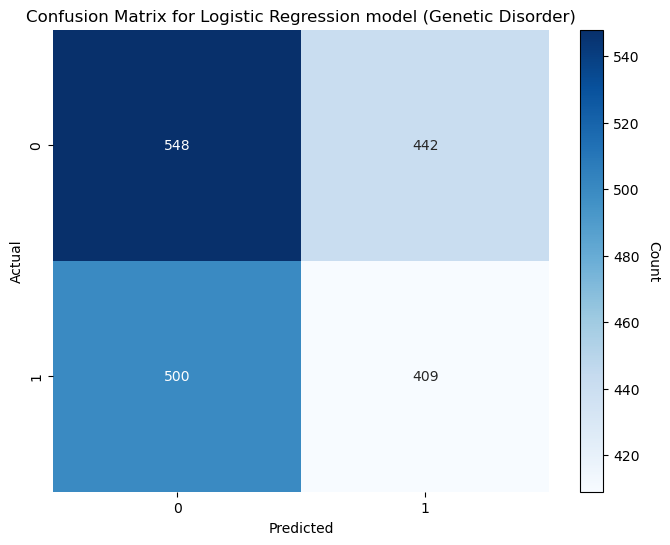

In [424]:
# Confusion Matrix Heatmap for Logistic Regression model
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(GDtesting_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Logistic Regression model (Genetic Disorder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add legend
cbar = heatmap.figure.colorbar(heatmap.collections[0])
cbar.set_label('Count', rotation=270, labelpad=15)

plt.show()

# The confusion matrix heatmap allows users to visually assess how well the Logistic Regression model \
# is performing in predicting the "Genetic Disorder" by comparing the predicted and actual classes. The goal is \
# to have higher counts along the diagonal (from the top left to the bottom right), indicating correct predictions, and \
# lower counts in off-diagonal cells, indicating misclassifications. The color intensity provides a quick visual summary \
# of the distribution of predictions.

In [425]:
# Get the names of all features used for training
all_feature_names = GeneticDisorder_encoded_df.drop(['GeneticDisorder_Present'], axis=1).columns

# Check if the lengths match
if len(all_feature_names) == len(coefficients):
    # Create a DataFrame to display feature names and their coefficients
    feature_coefficients_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

    # Display the DataFrame sorted by absolute coefficient values
    feature_coefficients_df['Absolute Coefficient'] = feature_coefficients_df['Coefficient'].abs()
    feature_coefficients_df = feature_coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

    # Display the top features and their coefficients
    print(feature_coefficients_df)
else:
    print("Error: Length mismatch between feature names and coefficients.")


# Coefficients indicate the strength and direction (positive or negative) of the relationship between each feature and the predicted outcome. \
# A negative coefficient suggests an inverse relationship between the feature and the predicted outcome. As "Patient Age" and "Blood cell count (mcL)" \
# have negative coefficients, an increase in these values is associated with a decrease in the predicted outcome (lower likelihood of a Genetic Disorder).
# Magnitude (Absolute Coefficient) of the coefficient indicates the strength of the relationship. Larger absolute values indicate a stronger influence on the predicted outcome.


                                             Feature  Coefficient  \
8                                    Status_Deceased     0.078214   
7                                  Paternal gene_Yes     0.060423   
20     H/O radiation exposure (x-ray)_Not applicable    -0.058189   
29               Blood test result_slightly abnormal     0.054567   
15                      Birth asphyxia_Not available     0.046273   
4                         Genes in mother's side_Yes     0.044714   
25  History of anomalies in previous pregnancies_Yes    -0.034756   
5                          Inherited from father_Yes     0.032053   
23                           H/O substance abuse_Yes     0.031403   
18        Folic acid details (peri-conceptional)_Yes    -0.028000   
6                                  Maternal gene_Yes     0.026761   
21                H/O radiation exposure (x-ray)_Yes     0.024151   
10                 Heart Rate (rates/min_Tachycardia    -0.022554   
14                          Birth 

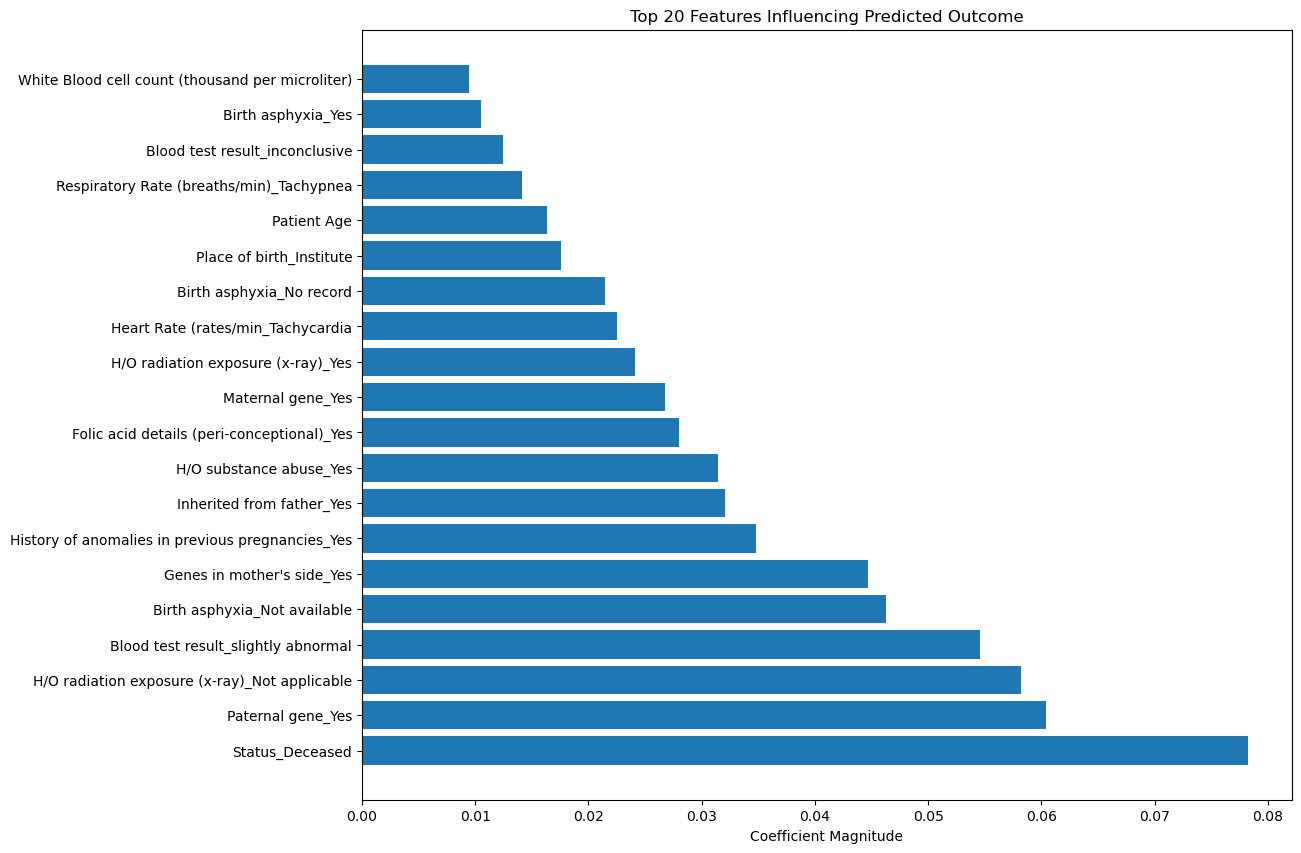

In [426]:
coefficients = lr_model.coef_[0]

# Get the absolute values of coefficients for feature importance
feature_importance = abs(coefficients)

# Get the names of all features
all_feature_names = GeneticDisorder_encoded_df.columns

# Get the indices of the top 20 features
top_20_indices = feature_importance.argsort()[-20:][::-1]

# Get the names and importance of the top 20 features
top_20_feature_names = all_feature_names[top_20_indices]
top_20_feature_importance = feature_importance[top_20_indices]

# Plot the top 20 features and their importance
plt.figure(figsize=(12, 10))
plt.barh(top_20_feature_names, top_20_feature_importance)
plt.xlabel('Coefficient Magnitude')
plt.title('Top 20 Features Influencing Predicted Outcome')
plt.show()

# This graph helps users identify and prioritize the most influential features for the logistic regression model. \
# "Coefficient Magnitude" is a measure of how much a feature contributes to the model's predictions, considering both \
# the positive and negative impacts. Larger magnitudes indicate features that have a more substantial influence on the predicted outcome.

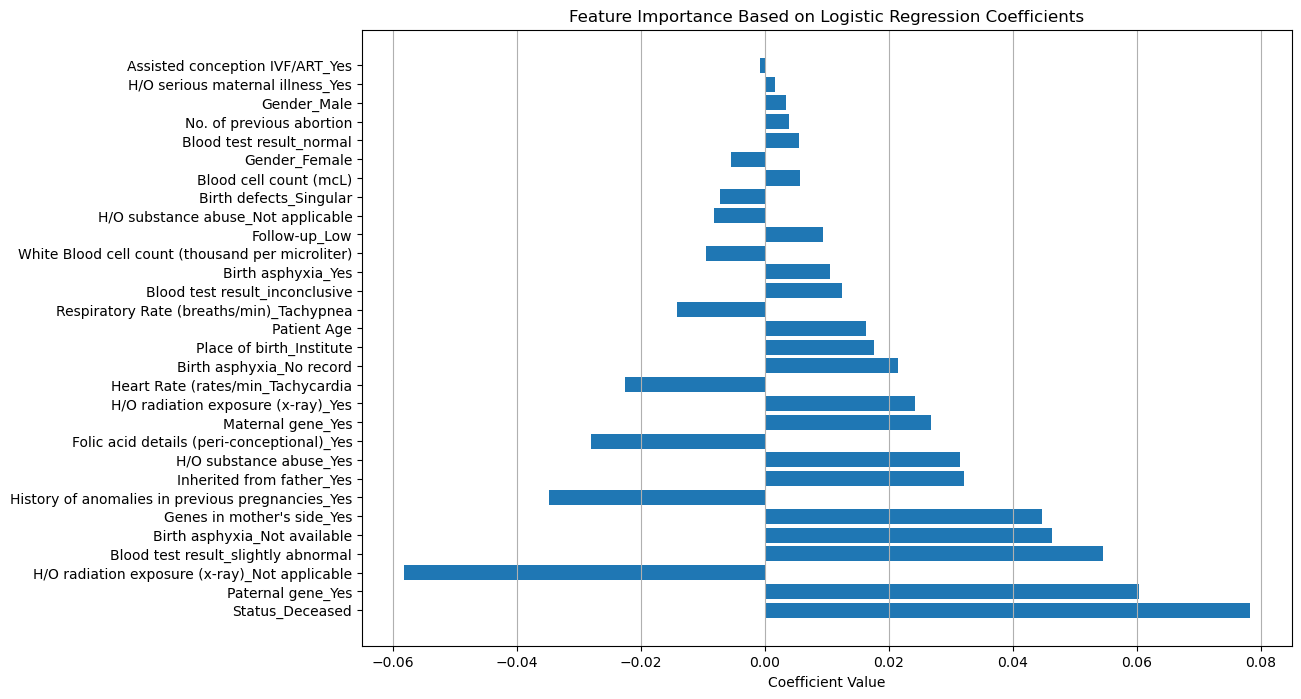

In [427]:
# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_coefficients_df['Feature'], feature_coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Logistic Regression Coefficients')
plt.grid(axis='x')
plt.show()

# The graph shows the contribution of each feature to the logistic regression model's predictions \
# The length of each bar represents the magnitude of the coefficient for a specific feature. Larger magnitudes \
# (positive or negative) indicate a stronger impact on the predicted outcome.  The direction of the bar (to the right or left of the centerline) \
# indicates the direction of the impact. If the bar is to the right, it suggests a positive impact on the predicted outcome, while a bar to the left suggests a negative impact. \
# Positive coefficients suggest that an increase in the corresponding feature value makes the prediction more likely to be in class 1 ("Present" in this case), while negative coefficients suggest the opposite.